C:\Users\khush\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Percentage of accidents occur in urban areas is 64%
Percentage of accidents occur in rural areas is 36%
Percentage of accidents occur in other areas is 0%


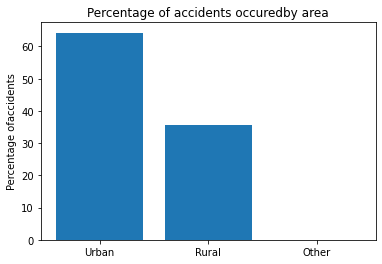

In [6]:
#Percentage of accidents by area
import pandas as pd
import matplotlib.pyplot as plt
acci=pd.read_csv("Datasets_DV/Accidents0514.csv")
cf=pd.read_csv("Datasets_DV/Casualties0514.csv")
vf=pd.read_csv("Datasets_DV/Vehicles0514.csv")
urban_acci =len(acci[acci['Urban_or_Rural_Area']==1])
rural_acci =len(acci[acci['Urban_or_Rural_Area']==2])
na_acci =len(acci[acci['Urban_or_Rural_Area']==3])
total_acci = urban_acci + rural_acci + na_acci
urban_pct = urban_acci / total_acci * 100
rural_pct = rural_acci / total_acci *100
na_pct = na_acci / total_acci * 100
print("Percentage of accidents occur in urban areas is {0:.0f}%".format(urban_pct))
print("Percentage of accidents occur in rural areas is {0:.0f}%".format(rural_pct))
print("Percentage of accidents occur in other areas is {0:.0f}%".format(na_pct))
x = ['Urban', 'Rural', 'Other']
y = [urban_pct, rural_pct,na_pct]
x_pos =list(range(len(x)))
plt.bar(x_pos, y)
plt.ylabel('Percentage ofaccidents')
plt.xticks(x_pos,x)
plt.title("Percentage of accidents occuredby area")
plt.show()

In [7]:
#Most dangerous time to drive
acci['Hour'] = acci['Time'].map(lambda x: str(x).split(':')[0])
acci['Hour'] = acci['Hour'].apply(pd.to_numeric, errors='coerce')
print(acci['Hour'])

0          17.0
1          17.0
2           0.0
3          10.0
4          21.0
           ... 
1640592    22.0
1640593     6.0
1640594     2.0
1640595     6.0
1640596    15.0
Name: Hour, Length: 1640597, dtype: float64


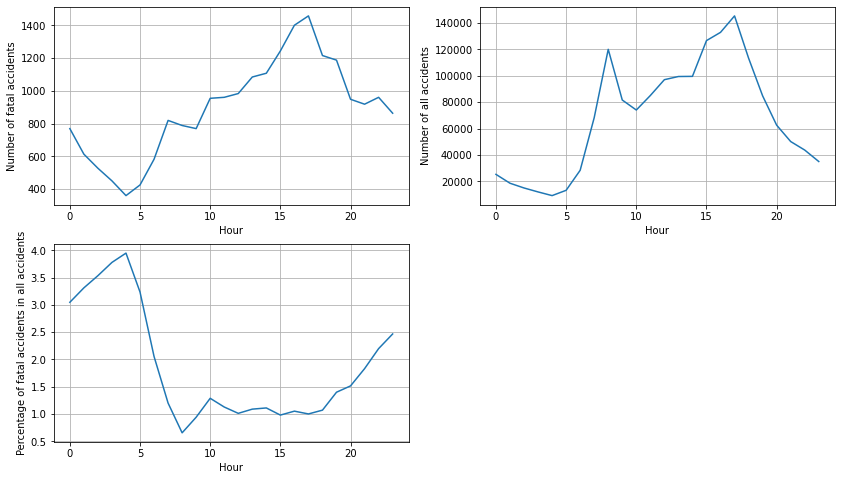

In [9]:
import numpy as np
hour = []
num_of_fatal_acci = []
num_of_acci = []

for i in range(24):
    hour.append(i)
    num_of_fatal_acci_hour = len(acci[(acci['Accident_Severity'] == 1) &(acci['Hour'] == i)])
    num_of_acci_hour = len(acci[acci['Hour'] == i])
    num_of_fatal_acci.append(num_of_fatal_acci_hour)
    num_of_acci.append(num_of_acci_hour)
    normalized_num_of_fatal_acci = list(np.array(num_of_fatal_acci) / np.array(num_of_acci) *100)
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(221)
ax1.plot(hour, num_of_fatal_acci)
ax1.set_ylabel('Number of fatal accidents')
ax1.set_xlabel('Hour')
ax1.grid(True)
ax2 = fig.add_subplot(222)
ax2.plot(hour, num_of_acci)
ax2.set_ylabel('Number of all accidents')
ax2.set_xlabel('Hour')
ax2.grid(True)
ax3 = fig.add_subplot(223)
ax3.plot(hour, normalized_num_of_fatal_acci)
ax3.set_ylabel('Percentage of fatal accidents in all accidents')
ax3.set_xlabel('Hour')
ax3.grid(True)
plt.show()

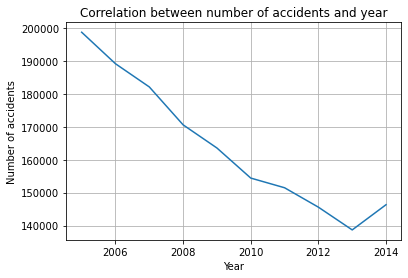

In [10]:
#Accidents occurring per year
acci['Year'] = acci['Accident_Index'].map(lambda x: str(x)[:4])
acci['Year'] = acci['Year'].apply(pd.to_numeric, errors='coerce')
year = []
num_of_acci_year = []
for i in range(2005, 2015):
    year.append(i)
    num_of_acci_year.append(len(acci[acci['Year'] == i]))
plt.plot(year, num_of_acci_year)
plt.xlabel('Year')
plt.ylabel('Number of accidents')
plt.title('Correlation between number of accidents and year')
plt.grid(True)
plt.show()

In [12]:
#Ratio of type of injuries
cf=pd.read_csv("Datasets_DV/Casualties0514.csv")
Severity1 =len(cf[cf['Casualty_Severity']==1]) #Most 
Severity2 =len(cf[cf['Casualty_Severity']==2])
Severity3 =len(cf[cf['Casualty_Severity']==3])
tot=Severity1+Severity2+Severity3;
s1=(Severity1/tot)*100;
s2=(Severity2/tot)*100;
s3=(Severity3/tot)*100;
print("Percentage of Deaths is {0:.0f}%".format(s1))
print("Percentage of Major Injuries is {0:.0f}%".format(s2))
print("Percentage of Minor Injuires is {0:.0f}%".format(s3))
labels = 'Deaths','MajorInjuries','Minor Injuries'
sizes = [s1, s2, s3]
colors = ['lightskyblue', 'yellowgreen', 'lightcoral']
explode = (0, 0, 0)

Percentage of Deaths is 1%
Percentage of Major Injuries is 11%
Percentage of Minor Injuires is 88%


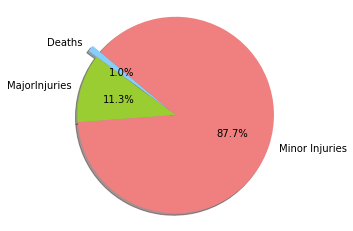

In [9]:
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

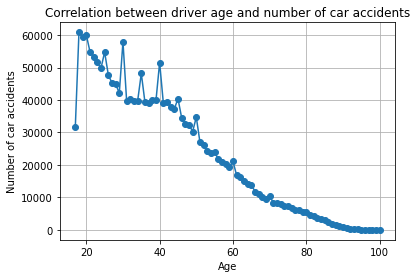

In [10]:
#Number of Car accidents per age
age_acci = vf[['Accident_Index', 'Age_of_Driver', 'Vehicle_Type']]
age = []
num_of_acci = []
for i in range(17, max(age_acci['Age_of_Driver'])+1):
    age.append(i)
    num_of_acci.append(len(age_acci[(age_acci['Age_of_Driver']==i)&(age_acci['Vehicle_Type']==9)]))
plt.plot(age, num_of_acci, label = 'Data', marker = 'o')
plt.xlabel('Age')
plt.ylabel('Number of car accidents')
plt.title('Correlation between driver age and number of  accidents')
plt.grid(True)
plt.show()   

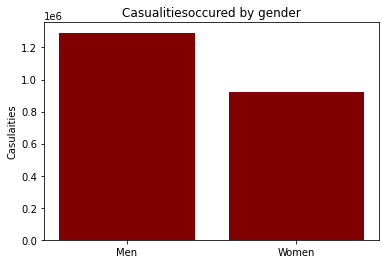

In [11]:
#ratio of men is to women
men =len(cf[cf['Sex_of_Casualty']==1])
women =len(cf[cf['Sex_of_Casualty']==2])
x = ['Men', 'Women']
y = [men,women]
x_pos =list(range(len(x)))
plt.bar(x_pos, y,color ='maroon')
plt.ylabel('Casulaities')
plt.xticks(x_pos,x)
plt.title("Casualitiesoccured by gender")
plt.show()

In [1]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
import numpy as np
import pandas as pd

def graph():
    vehi=pd.read_csv('Datasets DV/Vehicles0514.csv')
    age_acci = vehi[['Accident_Index', 'Age_of_Driver', 'Vehicle_Type']]
    age = []
    num_of_acci = []
    for i in range(17, max(age_acci['Age_of_Driver'])+1):
        age.append(i)
        num_of_acci.append(len(age_acci[(age_acci['Age_of_Driver']==i)&(age_acci['Vehicle_Type']== 9 )]))

    fig = px.line(x=age, y=num_of_acci, labels={'x':'Age', 'y':'Number of car accidents'})
    return fig

def pieGraph():
    cf=pd.read_csv('Datasets DV/Casualties0514.csv')
    Severity1 =len(cf[cf['Casualty_Severity']==1])
    Severity2 =len(cf[cf['Casualty_Severity']==2])
    Severity3 =len(cf[cf['Casualty_Severity']==3])
    tot=Severity1+Severity2+Severity3;
    s1=(Severity1/tot)*100;
    s2=(Severity2/tot)*100;
    s3=(Severity3/tot)*100;

    fig=px.pie(values=[s1,s2,s3],names=['Severity 1','Severity 2','Severity 3'],title='Casualty Severity')
    labels = 'Deaths','MajorInjuries','Minor Injuries'
    sizes = [s1, s2, s3]
    colors = ['lightskyblue', 'yellowgreen', 'lightcoral']
    explode = (0.1, 0, 0)
    return fig


def bar_graph():
    acci=pd.read_csv('Datasets DV/Accidents0514.csv')
    cf=pd.read_csv('Datasets DV/Casualties0514.csv')
    vf=pd.read_csv('Datasets DV/Vehicles0514.csv')
    urban_acci =len(acci[acci['Urban_or_Rural_Area']==1])
    rural_acci =len(acci[acci['Urban_or_Rural_Area']==2])
    na_acci =len(acci[acci['Urban_or_Rural_Area']==3])
    total_acci = urban_acci + rural_acci + na_acci
    urban_pct = urban_acci / total_acci * 100
    rural_pct = rural_acci / total_acci *100
    na_pct = na_acci / total_acci * 100
    print("Percentage of accidents occur in urban areas is {0:.0f}%".format(urban_pct))
    print("Percentage of accidents occur in rural areas is {0:.0f}%".format(rural_pct))
    print("Percentage of accidents occur in other areas is {0:.0f}%".format(na_pct))
    x = ['Urban', 'Rural', 'Other']
    y = [urban_pct, rural_pct,na_pct]
    x_pos =list(range(len(x)))
    fig=px.bar(x=x,y=y,color=x,title='Urban, Rural, and Other Areas')
    return fig

def gender():
    cf=pd.read_csv('Datasets DV/Casualties0514.csv')
    men =len(cf[cf['Sex_of_Casualty']==1])
    women =len(cf[cf['Sex_of_Casualty']==2])
    x = ['Men', 'Women']
    y = [men,women]
    x_pos =list(range(len(x)))
    fig = px.bar(x=x, y=y)
    return fig

def accident_frequency():
    acci=pd.read_csv('Datasets DV/Accidents0514.csv')
    acci['Year'] = acci['Accident_Index'].map(lambda x: str(x)[:4])
    acci['Year'] = acci['Year'].apply(pd.to_numeric, errors='coerce')
    year = []
    num_of_acci_year = []
    for i in range(2005, 2015):
        year.append(i)
        num_of_acci_year.append(len(acci[acci['Year'] == i]))
    fig = px.line(x=year, y=num_of_acci_year, labels={'x':'Year', 'y':'Number of Accidents'})
    return fig

def fatal_accidents():
    cf=pd.read_csv('Datasets DV/Casualties0514.csv')
    fatal =len(cf[cf['Casualty_Severity']==3])
    non_fatal =len(cf[cf['Casualty_Severity']==2])
    x = ['Fatal', 'Non-Fatal']
    y = [fatal,non_fatal]
    x_pos =list(range(len(x)))
    fig = px.line(x=x, y=y)
    return fig

def number_of_accidents():
    acci=pd.read_csv('Datasets DV/Accidents0514.csv')
    acci['Hour'] = acci['Time'].map(lambda x: str(x).split(':')[0])
    acci['Hour'] = acci['Hour'].apply(pd.to_numeric, errors='coerce')
    hour = []
    num_of_fatal_acci = []
    num_of_acci = []
    for i in range(24):
        hour.append(i)
        num_of_fatal_acci_hour = len(acci[(acci['Accident_Severity'] == 1) &(acci['Hour'] == i)])
        num_of_acci_hour = len(acci[acci['Hour'] == i])
        num_of_fatal_acci.append(num_of_fatal_acci_hour)
        num_of_acci.append(num_of_acci_hour)
        normalized_num_of_fatal_acci = list(np.array(num_of_fatal_acci) / np.array(num_of_acci) *100)
    fig = px.line(x=hour, y=normalized_num_of_fatal_acci, labels={'x':'Hour', 'y':'Percentage of Fatal Accidents'})
    return fig






app = dash.Dash(__name__)
app.layout = html.Div([html.H1('Dashboard' , style={'textAlign': 'center'}),
html.H2('Analysis on Road Accidents', style={'textAlign': 'center'}),
html.Div([dcc.Graph(id='graph', figure=graph()), 
dcc.Graph(id='pie', figure=pieGraph()), 
dcc.Graph(id='bar', figure=bar_graph()), 
dcc.Graph(id='noa', figure=number_of_accidents()),
dcc.Graph(id='gender',figure=gender())])
]) 


app.run_server()

<ipython-input-1-0d3de123ec5d>:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
<ipython-input-1-0d3de123ec5d>:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
<ipython-input-1-0d3de123ec5d>:118: DtypeWarning:

Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.



Percentage of accidents occur in urban areas is 64%
Percentage of accidents occur in rural areas is 36%
Percentage of accidents occur in other areas is 0%


<ipython-input-1-0d3de123ec5d>:119: DtypeWarning:

Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.



Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [29/Nov/2021 17:43:46] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [29/Nov/2021 17:43:46] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [29/Nov/2021 17:43:46] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [29/Nov/2021 17:43:46] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 200 -
127.0.0.1 - - [29/Nov/2021 17:43:46] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 200 -


In [15]:
cf=pd.read_csv("Datasets DV/Casualties0514.csv")
vf=pd.read_csv("Datasets DV/Vehicles0514.csv")
acci=pd.read_csv("Datasets DV/Accidents0514.csv")
first_df=pd.merge(cf,acci,on='Accident_Index')
df=pd.merge(first_df,vf,on='Accident_Index')


C:\Users\PC-DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3418: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [16]:
q8df= pd.DataFrame(data=df, columns=['Journey_Purpose_of_Driver','Sex_of_Driver','Age_of_Driver','Age_Band_of_Driver','Driver_Home_Area_Type'])

In [17]:
q8df=q8df[q8df.Sex_of_Driver !=-1]

In [18]:
map_df={1:'Journey as part of work',2:'Commuting to/from work',3:'Taking pupil to/from school',4:'Pupil riding to/from school',5:'Other',6:'Not known'}
map_df_age={1:'0 - 5',2:'6 - 10',3:'11 - 15',4:'16 - 20',5:'21 - 25',6:'26 -35',7:'36 - 45',8:'46 - 55',9:'56 - 65',10:'66 - 75',11:'Over 75'}
map_df_area={1:'Urban Area',2:'Small Town',3:'Rural'}
q8df.Age_Band_of_Driver=q8df.Age_Band_of_Driver.map(map_df_age)
q8df.Journey_Purpose_of_Driver=q8df.Journey_Purpose_of_Driver.map(map_df)
q8df.Driver_Home_Area_Type=q8df.Driver_Home_Area_Type.map(map_df_area)

Text(0.5, 1.0, 'Journey Purpose of Driver vs Age_of_Driver')

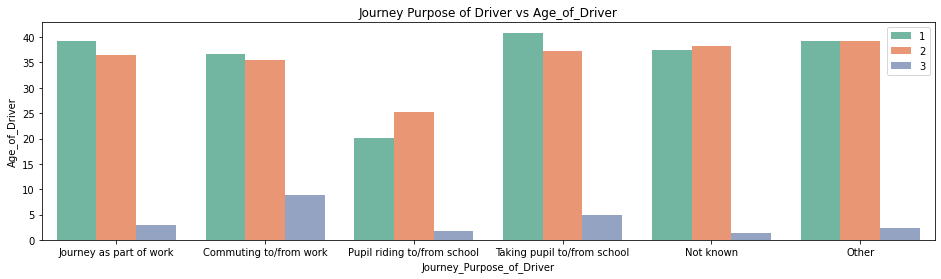

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,4))
sns.barplot('Journey_Purpose_of_Driver','Age_of_Driver',hue='Sex_of_Driver',data=q8df,ci=None,palette='Set2')
plt.legend(bbox_to_anchor=(1,1))
plt.title('Journey Purpose of Driver vs Age_of_Driver')